<a href="https://colab.research.google.com/github/TSUParticleModelingGroup/DEFall2020/blob/master/HW28Animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

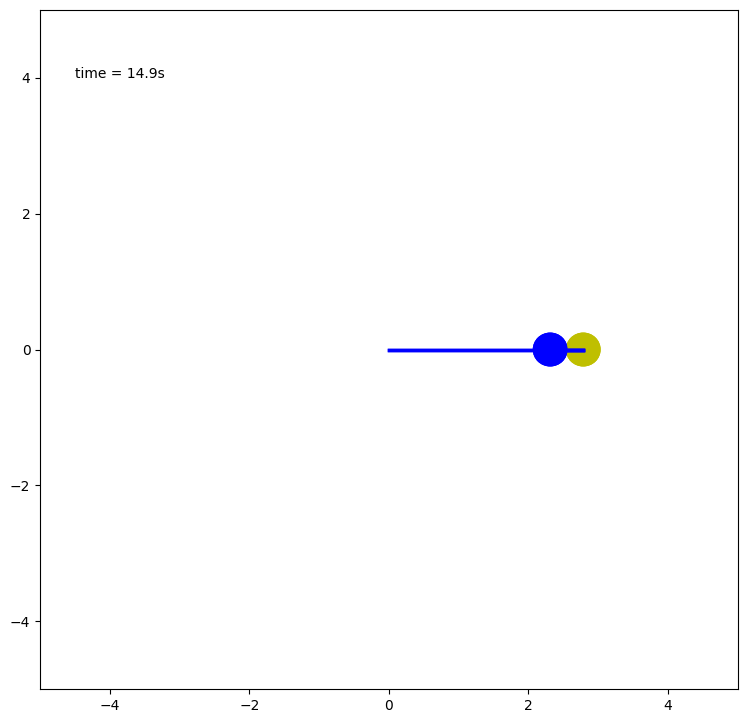

In [ ]:
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# Setting constants for the problem.
M1 = 2.0
K1 = 1.0
L1 = 0.5
C1 = 0.0

M2 = 3.0
K2 = 2.0
L2 = 1.0
C2 = 0.0

# Setting Initial conditions.
x1 = 1.0
vx1 = 0.0

x2 = 3.0
vx2 = 0.0

# Setting time variables
tStart = 0.0
tStop = 15.0
dt = 0.1
steps = int((tStop - tStart)/dt)  # Number of steps (frames) in the animation.

# Setting up the viewing window
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(9, 9)

# Setting up axes of viewing window
ax = plt.axes(xlim=(-5, 5), ylim=(-5, 5))

# Defining what the bodies look like
ball1 = plt.Circle((x1, 0), 0.25, fc='y')  # (x1, 0) is the center (0 because we are in 1D), 0.25 is the radius and fc sets the color.
ball2 = plt.Circle((x2, 0), 0.25, fc='b')

# Defining what the lines "springs" connecting the bodies look like.
line1 = plt.Line2D((0.0, 0.0), (x1, 0.0), lw=2.5, c='b') # Line connecting body1 to the wall. Line end points, width of the line, color. 
line2 = plt.Line2D((x1, 0.0), (x2, 0.0), lw=2.5, c='b')  # Line connecting body1 and body2.

# Formating the time text to appear in the window.
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

# Initializing the animation
def init():
    line1.set_xdata([])
    line1.set_ydata([])
    line2.set_xdata([])
    line2.set_ydata([])
    ax.add_patch(ball1)
    ax.add_patch(ball2)
    ax.add_line(line1)
    ax.add_line(line2)
    time_text.set_text('')
    return ball1, ball2, line1, line2, time_text

# This is the animation. Euler's is inside. 
def animate(i):
    global x1, vx1, x2, vx2

    # Finding the forces.
    fx1 = K1*(L1 - x1) - K2*(L2 - (x2 - x1)) - C1*vx1
    fx2 = K2*(L2 - (x2 - x1)) - C2*vx2
    
    # Euler's method on velocities
    vx1new = vx1 + (fx1/M1)*dt
    vx2new = vx2 + (fx2/M2)*dt

    # Euler's method on positions
    x1new = x1 + vx1*dt
    x2new = x2 + vx2*dt

    # Updating the velocities
    vx1 = vx1new
    vx2 = vx2new

    # Updating the positions
    x1 = x1new
    x2 = x2new
    
    # Adding the results to the animation
    ball1.center = (x1, 0.0)
    ball2.center = (x2, 0.0)
    line1.set_xdata([0.0,x1])
    line1.set_ydata([0.0,0.0])
    line2.set_xdata([x1,x2])
    line2.set_ydata([0.0,0.0])
    time_text.set_text(time_template % (i*dt))
    return line1,line2,ball1,ball2,time_text
    
ani = animation.FuncAnimation(fig, animate, np.arange(dt, steps), interval=25, blit=True, init_func=init)

HTML(ani.to_html5_video())